In [1]:
# nb-rbm-all-segs-py39

In [2]:
import ipykernel
import numpy as np

In [3]:
!conda info|find "active environment"

     active environment : py39


In [4]:
import sys

import pandas as pd
import tensorflow as tf
import time
tf.get_logger().setLevel('ERROR') # only show error messages
import random
from tqdm.notebook import tqdm
from recommenders.models.rbm.rbm import RBM
from recommenders.datasets.python_splitters import numpy_stratified_split
from recommenders.datasets.sparse import AffinityMatrix
from recommenders.datasets import movielens
from recommenders.evaluation.python_evaluation import map_at_k, ndcg_at_k, precision_at_k, recall_at_k
from recommenders.utils.timer import Timer
from recommenders.utils.plot import line_graph
from user_func import toratings, prdf
from IPython.display import Markdown
import matplotlib.pyplot as plt
from importlib import reload
from settings import *

#For interactive mode only
%load_ext autoreload
%autoreload 2
%matplotlib inline

print(f'System version: {sys.version}')
print(f'Pandas version: {pd.__version__}')
print(f'Tensorflow version: {tf.__version__}')

.\cache\2019-Nov.csv
.\cache\2019-Oct.csv
.\cache\test.csv
.\cache\test_full.csv
.\cache\train.csv
System version: 3.9.19 (main, Mar 21 2024, 17:21:27) [MSC v.1916 64 bit (AMD64)]
Pandas version: 1.5.3
Tensorflow version: 2.17.0-dev20240422


In [5]:
start_time = time.time()

## Load data

In [6]:
pd.options.display.float_format = "{:,.2f}".format

In [7]:
while not showcase_seg_file.is_file():
    time.sleep(30)
dataset = pd.read_pickle(ds_flt_file) # Полные данные после фильтрации
df = pd.read_pickle(showcase_seg_file) # Сегментированная витрина

#to use standard names across the analysis 
header = {
        "col_user": "userID",
        "col_item": "itemID",
        "col_rating": "rating",
    }

# number of top score elements to be recommended  
K = 5

In [8]:
ds_flt_file.is_file()

True

In [9]:
def load_data(seg):
    ds = toratings(df[df['Segment']==seg], dataset, False) # Отстутствие покупки попадает в список с 0 рейтингом
    data = ds[['userID', 'itemID', 'rating']]
    return ds

In [10]:
def ranking_metrics(
    data_size,
    data_true,
    data_pred,
    K
):

    eval_map = map_at_k(data_true, data_pred, col_user="userID", col_item="itemID", 
                    col_rating="rating", col_prediction="prediction", 
                    relevancy_method="top_k", k= K)

    eval_ndcg = ndcg_at_k(data_true, data_pred, col_user="userID", col_item="itemID", 
                      col_rating="rating", col_prediction="prediction", 
                      relevancy_method="top_k", k= K)

    eval_precision = precision_at_k(data_true, data_pred, col_user="userID", col_item="itemID", 
                               col_rating="rating", col_prediction="prediction", 
                               relevancy_method="top_k", k= K)

    eval_recall = recall_at_k(data_true, data_pred, col_user="userID", col_item="itemID", 
                          col_rating="rating", col_prediction="prediction", 
                          relevancy_method="top_k", k= K)

    
    df_result = pd.DataFrame(
        {   "Dataset": data_size,
            "K": K,
            "MAP": eval_map,
            "nDCG@k": eval_ndcg,
            "Precision@k": eval_precision,
            "Recall@k": eval_recall,
        }, 
        index=[0]
    )
    
    return df_result

Took 4.55 seconds for training.


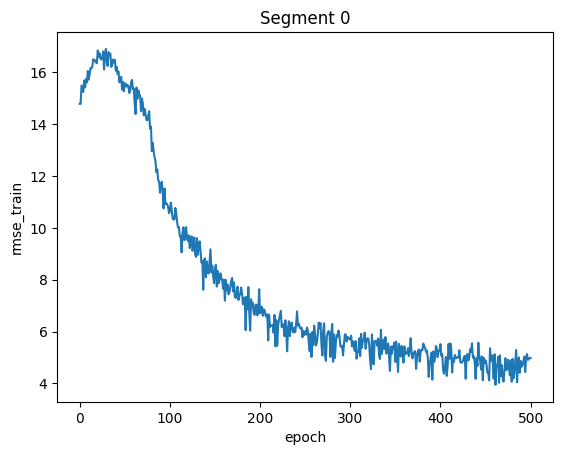

Took 0.12 seconds for prediction.

Сегмент: 0
Пользователь: 514661933
Рекомендовано: ['shirt', 'coffee_grinder', 'cooler']
Куплено: {'microwave', 'kettle'}

Пользователь: 512742880
Рекомендовано: ['shirt', 'coffee_grinder', 'cooler']
Куплено: {'monitor', 'desktop'}



,Dataset,K,MAP,nDCG@k,Precision@k,Recall@k
0,segment 0,3,0.09,0.09,0.03,0.10


---

Took 11.51 seconds for training.


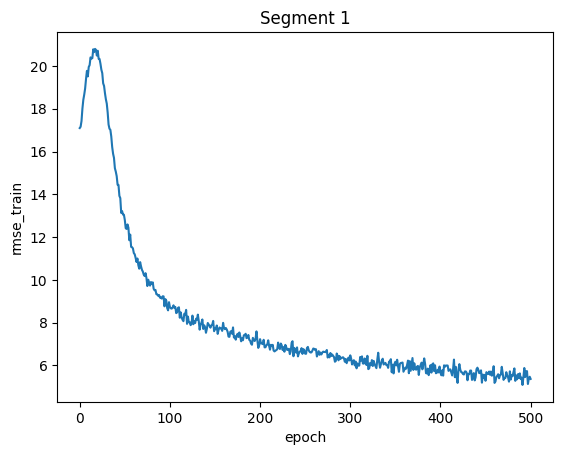

Took 0.13 seconds for prediction.

Сегмент: 1
Пользователь: 565778227
Рекомендовано: ['sock', 'shirt', 'parktronic']
Куплено: {'tv'}

Пользователь: 519858959
Рекомендовано: ['fan', 'tennis', 'sock']
Куплено: {'tv'}



,Dataset,K,MAP,nDCG@k,Precision@k,Recall@k
0,segment 1,3,0.12,0.12,0.04,0.12


---

Took 3.61 seconds for training.


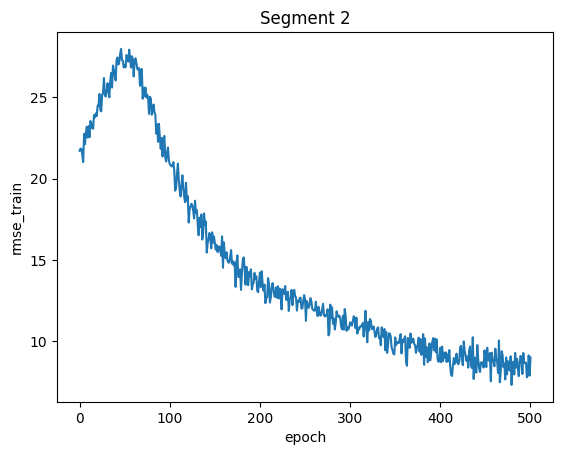

Took 0.09 seconds for prediction.

Сегмент: 2
Пользователь: 521566705
Рекомендовано: ['slipons', 'desktop', 'microphone']
Куплено: {'ironing_board'}

Пользователь: 519638671
Рекомендовано: ['slipons', 'desktop', 'microphone']
Куплено: {'monitor', 'headphone', 'washer'}



,Dataset,K,MAP,nDCG@k,Precision@k,Recall@k
0,segment 2,3,0.07,0.08,0.03,0.10


---

Took 39.97 seconds for training.


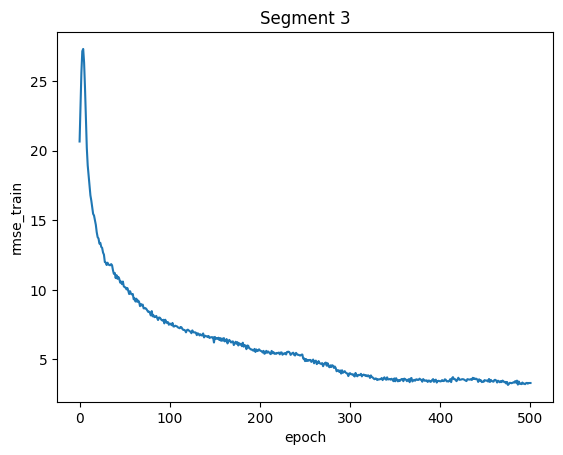

Took 0.16 seconds for prediction.

Сегмент: 3
Пользователь: 515104892
Рекомендовано: ['microwave', 'vacuum', 'hdd']
Куплено: {'clocks'}

Пользователь: 558235453
Рекомендовано: ['clocks', 'vacuum', 'hdd']
Куплено: {'headphone'}



,Dataset,K,MAP,nDCG@k,Precision@k,Recall@k
0,segment 3,3,0.11,0.11,0.04,0.11


---

Took 4.64 seconds for training.


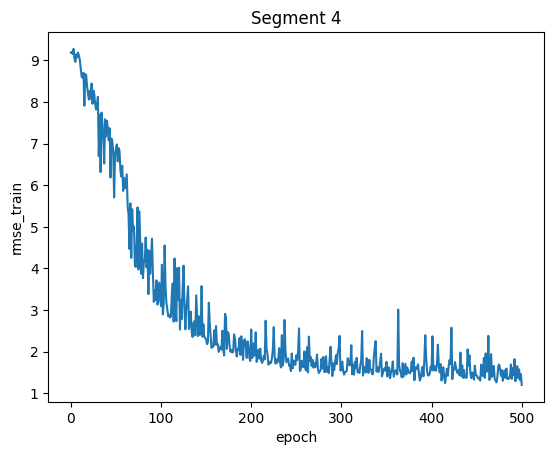

Took 0.08 seconds for prediction.

Сегмент: 4
Пользователь: 514240290
Рекомендовано: ['cultivator', 'steam_cooker', 'faucet']
Куплено: {'oven', 'mixer'}

Пользователь: 561237657
Рекомендовано: ['cultivator', 'steam_cooker', 'tonometer']
Куплено: {'keds', 'iron', 'juicer', 'generator', 'washer'}



,Dataset,K,MAP,nDCG@k,Precision@k,Recall@k
0,segment 4,3,0.09,0.09,0.03,0.10


---

Took 2.10 seconds for training.


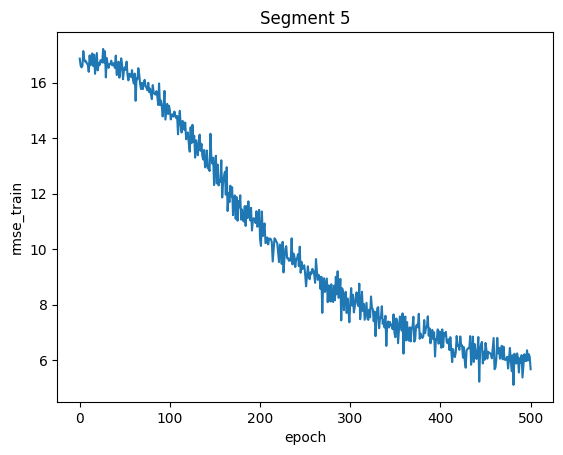

Took 0.10 seconds for prediction.

Сегмент: 5
Пользователь: 565173351
Рекомендовано: ['printer', 'blender', 'welding']
Куплено: {'air_conditioner'}

Пользователь: 514696726
Рекомендовано: ['printer', 'blender', 'hood']
Куплено: {'microwave', 'air_conditioner', 'vacuum', 'washer'}



,Dataset,K,MAP,nDCG@k,Precision@k,Recall@k
0,segment 5,3,0.12,0.14,0.07,0.20


---

Took 22.14 seconds for training.


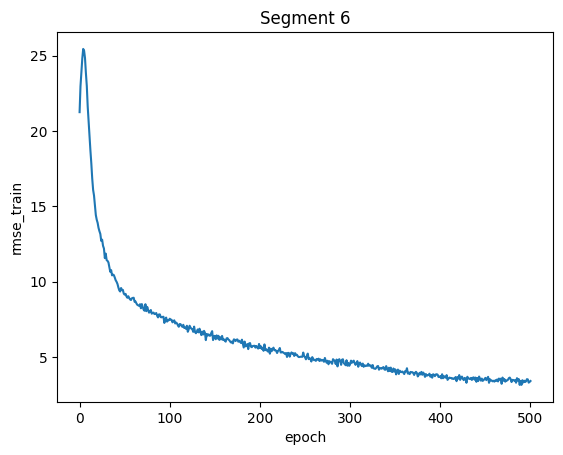

Took 0.14 seconds for prediction.

Сегмент: 6
Пользователь: 547796248
Рекомендовано: ['diapers', 'kettle', 'grill']
Куплено: {'washer'}

Пользователь: 533511642
Рекомендовано: ['diapers', 'kettle', 'grill']
Куплено: {'oven'}



,Dataset,K,MAP,nDCG@k,Precision@k,Recall@k
0,segment 6,3,0.02,0.03,0.01,0.04


---

Took 4.58 seconds for training.


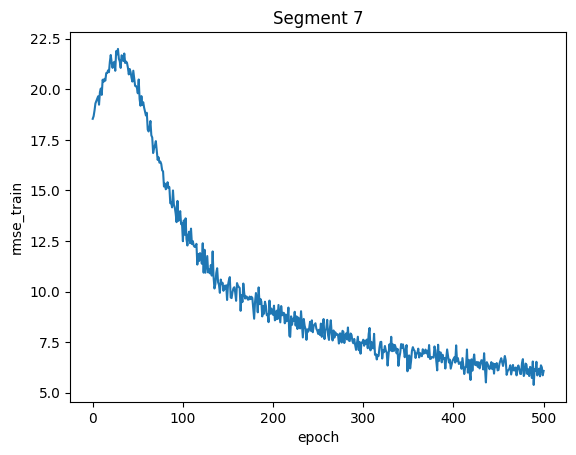

Took 0.10 seconds for prediction.

Сегмент: 7
Пользователь: 512786119
Рекомендовано: ['bed', 'table', 'faucet']
Куплено: {'diapers'}

Пользователь: 512772116
Рекомендовано: ['table', 'faucet', 'toster']
Куплено: {'tv', 'subwoofer', 'washer'}



,Dataset,K,MAP,nDCG@k,Precision@k,Recall@k
0,segment 7,3,0.10,0.10,0.04,0.11


---

Took 5.99 seconds for training.


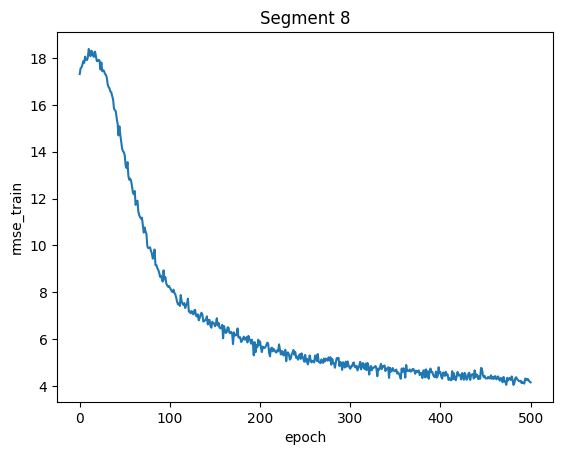

Took 0.11 seconds for prediction.

Сегмент: 8
Пользователь: 513605177
Рекомендовано: ['steam_cooker', 'video', 'toster']
Куплено: {'videoregister', 'washer'}

Пользователь: 516764108
Рекомендовано: ['steam_cooker', 'video', 'toster']
Куплено: {'printer'}



,Dataset,K,MAP,nDCG@k,Precision@k,Recall@k
0,segment 8,3,0.04,0.04,0.02,0.06


---

Took 9.27 seconds for training.


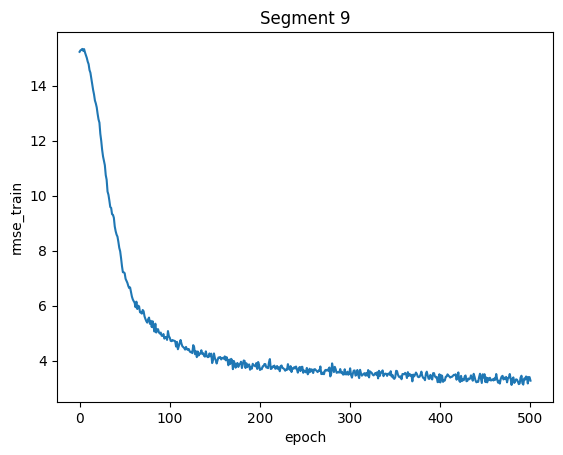

Took 0.10 seconds for prediction.

Сегмент: 9
Пользователь: 520010400
Рекомендовано: ['radar', 'telephone', 'alarm']
Куплено: {'player', 'vacuum'}

Пользователь: 549501187
Рекомендовано: ['radar', 'tablet', 'vacuum']
Куплено: {'telephone'}



,Dataset,K,MAP,nDCG@k,Precision@k,Recall@k
0,segment 9,3,0.12,0.13,0.05,0.15


---

Took 2.24 seconds for training.


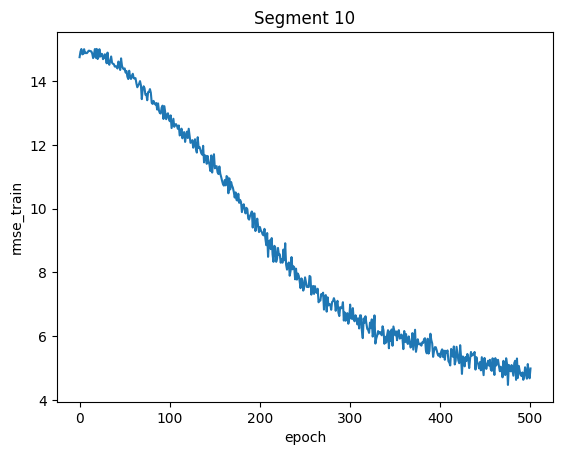

Took 0.08 seconds for prediction.

Сегмент: 10
Пользователь: 555578904
Рекомендовано: ['photo', 'blanket', 'player']
Куплено: {'microwave', 'air_heater', 'grill', 'refrigerators'}

Пользователь: 512518332
Рекомендовано: ['photo', 'blanket', 'coffee_grinder']
Куплено: {'notebook', 'sewing_machine', 'telephone'}



,Dataset,K,MAP,nDCG@k,Precision@k,Recall@k
0,segment 10,3,0.10,0.10,0.04,0.12


---

Took 5.74 seconds for training.


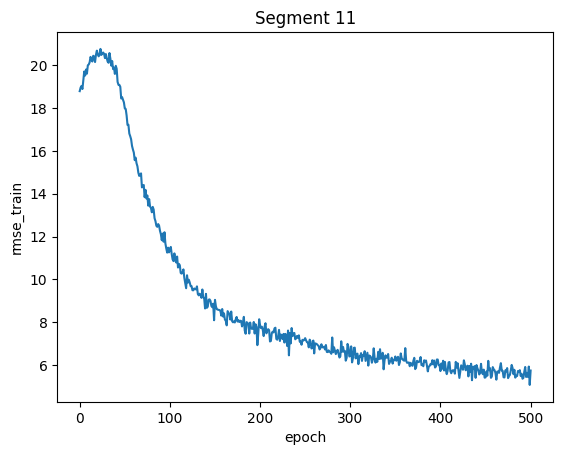

Took 0.11 seconds for prediction.

Сегмент: 11
Пользователь: 540196295
Рекомендовано: ['sandals', 'steam_cooker', 'tablet']
Куплено: {'notebook', 'bag'}

Пользователь: 515353374
Рекомендовано: ['sandals', 'wallet', 'compressor']
Куплено: {'tablet', 'cabinet'}



,Dataset,K,MAP,nDCG@k,Precision@k,Recall@k
0,segment 11,3,0.07,0.07,0.03,0.09


---

Took 3.08 seconds for training.


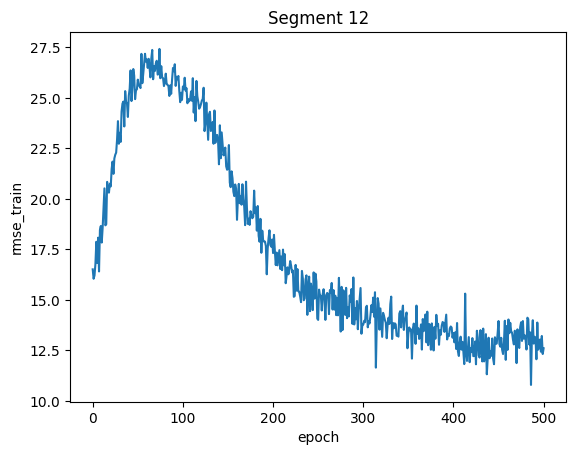

Took 0.10 seconds for prediction.

Сегмент: 12
Пользователь: 558766123
Рекомендовано: ['generator', 'dolls', 'printer']
Куплено: {'saw'}

Пользователь: 533483808
Рекомендовано: ['mixer', 'refrigerators', 'ballet_shoes']
Куплено: {'generator', 'sewing_machine'}



,Dataset,K,MAP,nDCG@k,Precision@k,Recall@k
0,segment 12,3,0.00,0.00,0.00,0.00


---

In [11]:
###### Run main loop over all segments
prec = pd.DataFrame()
#plt=reload(plt)
%matplotlib inline
random.seed(42)
for seg in set(df['Segment']):
    ds = load_data(seg)
    data = ds[['userID', 'itemID', 'rating']]

    #instantiate the sparse matrix generation  
    am = AffinityMatrix(df = data, **header)

    #obtain the sparse matrix 
    X, _, _ = am.gen_affinity_matrix()

    Xtr, Xtst = numpy_stratified_split(X, ratio=0.8, seed=42)

    #print(f'train matrix size {Xtr.shape}')
    #print(f'test matrix size {Xtst.shape}')

    #First we initialize the model class
    model = RBM(
         # create a sorted list of all the unique ratings (of float type)
        possible_ratings=np.setdiff1d(np.unique(Xtr), np.array([0])),
        visible_units=Xtr.shape[1],
        hidden_units=600, # number of hidden units
        training_epoch=500,
        # minibatch_size=60, # size of the minibatch used in the random minibatches training; setting to 1 corresponds to
        # stochastic gradient descent, and it is considerably slower. Good performance is achieved
        # for a size of ~100.
        keep_prob=0.95,
        with_metrics=True, # if true, compute msre and accuracy during training
        debug=False,
    )
    if Xtr.shape[0] < 100:
        model.minibatch_size = Xtr.shape[0] // 2
    
    # Model Fit
    with Timer() as train_time:
        model.fit(Xtr)
    
    print("Took {:.2f} seconds for training.".format(train_time.interval))
    
    # Plot the train RMSE as a function of the epochs
    plt.xlabel('epoch')
    plt.ylabel('rmse_train')
    plt.title(f'Segment {seg}')
    plt.plot(model.rmse_train)#, labels='train', x_name='epoch', y_name='rmse_train')
    plt.show();

    # Model prediction on the test set Xtst.
    with Timer() as prediction_time:
        top_k =  model.recommend_k_items(Xtst)
    print("Took {:.2f} seconds for prediction.".format(prediction_time.interval))

    top_k_df = am.map_back_sparse(top_k, kind = 'prediction')
    test_df = am.map_back_sparse(Xtst, kind = 'ratings')
    top_k_df = top_k_df.fillna(0)
    id2name = ds[['itemID', 'category']].drop_duplicates()
    merged_df = top_k_df.merge(id2name, on='itemID', how='left')
    print(f'\nСегмент: {seg}')
    for idx in random.sample(range(0, len(top_k_df)), 2):
        user_id = top_k_df['userID'].iloc[idx]
        print(f'Пользователь: {user_id}')
        filtered_df = merged_df[merged_df['userID'] == user_id].sort_values('prediction', ascending=False)[:3]
        print(f'Рекомендовано: {[x for x in filtered_df["category"]]}')
        print(f'Куплено: {set(dataset[(dataset["user_id"]==user_id) & (dataset["event_type"]=="purchase")]["category_code_level2"])}\n')

    segdata = ranking_metrics(
        data_size=f'segment {seg}',
        data_true=test_df,
        data_pred=top_k_df,
        K=3
    )
    
    prdf(segdata)
    prec = pd.concat([prec, segdata], ignore_index=True)
    display(Markdown('---'))

In [12]:
prec.drop(columns=['Dataset','K'], inplace=True)
prec.index.name = 'Segment'
#prec.reset_index(inplace=True)
#prec.rename(columns={'index': 'Segment'}, inplace=True)

In [13]:
print(f'Метрики ранжирования при k={K}')
prdf(prec.T)
print()
for col in prec.columns:
    print(f'{col}\t{prec[col].mean():.2f}')

Метрики ранжирования при k=5


Segment,0,1,2,3,4,5,6,7,8,9,10,11,12
MAP,0.09,0.12,0.07,0.11,0.09,0.12,0.02,0.10,0.04,0.12,0.10,0.07,0.00
nDCG@k,0.09,0.12,0.08,0.11,0.09,0.14,0.03,0.10,0.04,0.13,0.10,0.07,0.00
Precision@k,0.03,0.04,0.03,0.04,0.03,0.07,0.01,0.04,0.02,0.05,0.04,0.03,0.00
Recall@k,0.10,0.12,0.10,0.11,0.10,0.20,0.04,0.11,0.06,0.15,0.12,0.09,0.00



MAP	0.08
nDCG@k	0.09
Precision@k	0.03
Recall@k	0.10


In [14]:
seconds=int(time.time() - start_time)
print("%d:%02d" % (seconds//60, seconds-60*(seconds//60),))

2:20
